# Premier League Analysis
This notebook is for analyzing data from the premier league. All data comes from [this football data website](https://www.football-data.co.uk/englandm.php) used mostly for betting information. I want to run some analysis on my favorite team's stats. 

In [37]:
import sqlite3
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Start the connection
Starting the connection to the existing database that I have created with the combine_excel.py file. Then I test it to see if the data is coming in.

In [2]:
conn = sqlite3.connect('EPL.db') 
cursorObj = conn.cursor()

cursorObj.execute("SELECT * FROM PremTable WHERE HomeTeam='West Ham' OR AwayTeam='West Ham'")
WH_Data = cursorObj.fetchall()

for row in WH_Data:
    print(row)

('18/08/12', 'West Ham', 'Aston Villa', 1.0, 0.0, 'H', 1.0, 0.0, 'H', 8.0, 10.0, 4.0, 6.0, 17.0, 8.0, 6.0, 4.0, 0.0, 1.0, 0.0, 0.0, 2.2, 3.3, 3.4)
('25/08/12', 'Swansea', 'West Ham', 3.0, 0.0, 'H', 2.0, 0.0, 'H', 10.0, 7.0, 7.0, 6.0, 13.0, 17.0, 5.0, 4.0, 2.0, 4.0, 0.0, 0.0, 2.1, 3.3, 3.6)
('01/09/12', 'West Ham', 'Fulham', 3.0, 0.0, 'H', 3.0, 0.0, 'H', 17.0, 14.0, 12.0, 13.0, 12.0, 5.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.5, 3.25, 2.88)
('15/09/12', 'Norwich', 'West Ham', 0.0, 0.0, 'D', 0.0, 0.0, 'D', 20.0, 9.0, 14.0, 4.0, 10.0, 12.0, 8.0, 5.0, 0.0, 1.0, 0.0, 0.0, 2.38, 3.4, 3.0)
('22/09/12', 'West Ham', 'Sunderland', 1.0, 1.0, 'D', 0.0, 1.0, 'A', 20.0, 4.0, 11.0, 2.0, 12.0, 10.0, 10.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.1, 3.3, 3.6)
('01/10/12', 'QPR', 'West Ham', 1.0, 2.0, 'A', 0.0, 2.0, 'A', 13.0, 17.0, 9.0, 10.0, 9.0, 21.0, 4.0, 13.0, 1.0, 8.0, 1.0, 0.0, 2.05, 3.4, 3.75)
('06/10/12', 'West Ham', 'Arsenal', 1.0, 3.0, 'A', 1.0, 1.0, 'D', 7.0, 20.0, 3.0, 14.0, 12.0, 7.0, 4.0, 16.0, 3.0, 2.0, 0.0

### Pandas
Although I would like to work in SQL more, it would be easier to use Pandas for this analysis so I am reading an SQL Query into a dataframe with a helpful function from pandas.

In [3]:
df = pd.read_sql_query("SELECT * FROM PremTable WHERE HomeTeam = 'West Ham' OR AwayTeam = 'West Ham'", conn)

In [4]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,18/08/12,West Ham,Aston Villa,1.0,0.0,H,1.0,0.0,H,8.0,...,8.0,6.0,4.0,0.0,1.0,0.0,0.0,2.20,3.30,3.40
1,25/08/12,Swansea,West Ham,3.0,0.0,H,2.0,0.0,H,10.0,...,17.0,5.0,4.0,2.0,4.0,0.0,0.0,2.10,3.30,3.60
2,01/09/12,West Ham,Fulham,3.0,0.0,H,3.0,0.0,H,17.0,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,2.50,3.25,2.88
3,15/09/12,Norwich,West Ham,0.0,0.0,D,0.0,0.0,D,20.0,...,12.0,8.0,5.0,0.0,1.0,0.0,0.0,2.38,3.40,3.00
4,22/09/12,West Ham,Sunderland,1.0,1.0,D,0.0,1.0,A,20.0,...,10.0,10.0,1.0,2.0,1.0,0.0,0.0,2.10,3.30,3.60


In [5]:
# This shows no nulls in the dataset. However, want the Date column to actually be a date format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 24 columns):
Date        285 non-null object
HomeTeam    285 non-null object
AwayTeam    285 non-null object
FTHG        285 non-null float64
FTAG        285 non-null float64
FTR         285 non-null object
HTHG        285 non-null float64
HTAG        285 non-null float64
HTR         285 non-null object
HS          285 non-null float64
AS          285 non-null float64
HST         285 non-null float64
AST         285 non-null float64
HF          285 non-null float64
AF          285 non-null float64
HC          285 non-null float64
AC          285 non-null float64
HY          285 non-null float64
AY          285 non-null float64
HR          285 non-null float64
AR          285 non-null float64
B365H       285 non-null float64
B365D       285 non-null float64
B365A       285 non-null float64
dtypes: float64(19), object(5)
memory usage: 53.6+ KB


### Fixing Dates ###
I wanted to simply use the datetime package to turn it into a date object. However, some of the dates in the dataset have a year ending with a format like '12' and some have the spelled out '2012'. I am turning them all to have the format "2012" and then turning them into the date objects. 

In [6]:
#Initialize blank list
fixed_dates = []

# For loop to correct the incorrect dates
for x in df['Date']:
    split_date = x.split('/') #split the date to check the year
    
    #if it is in the short format, add the 20 at the beginning
    if len(split_date[2]) == 2:
        year = split_date[2]
        new_year = '20' + year
        new_date = split_date[0] + '/' + split_date[1] + '/' + new_year
        fixed_dates.append(new_date)
    else:
        fixed_dates.append(x)

In [7]:
# Checking to make sure the dates look correct. (They are in UK format currently)
print("The length of the fixed dates list is", len(fixed_dates), "\n")
print(fixed_dates)

The length of the fixed dates list is 285 

['18/08/2012', '25/08/2012', '01/09/2012', '15/09/2012', '22/09/2012', '01/10/2012', '06/10/2012', '20/10/2012', '27/10/2012', '03/11/2012', '11/11/2012', '19/11/2012', '25/11/2012', '28/11/2012', '01/12/2012', '09/12/2012', '16/12/2012', '22/12/2012', '29/12/2012', '01/01/2013', '12/01/2013', '19/01/2013', '23/01/2013', '30/01/2013', '02/02/2013', '10/02/2013', '25/02/2013', '02/03/2013', '17/03/2013', '30/03/2013', '07/04/2013', '13/04/2013', '17/04/2013', '20/04/2013', '27/04/2013', '04/05/2013', '12/05/2013', '19/05/2013', '17/08/2013', '24/08/2013', '31/08/2013', '15/09/2013', '21/09/2013', '28/09/2013', '06/10/2013', '19/10/2013', '27/10/2013', '02/11/2013', '09/11/2013', '23/11/2013', '30/11/2013', '03/12/2013', '07/12/2013', '14/12/2013', '21/12/2013', '26/12/2013', '28/12/2013', '01/01/2014', '11/01/2014', '18/01/2014', '29/01/2014', '01/02/2014', '08/02/2014', '11/02/2014', '22/02/2014', '01/03/2014', '15/03/2014', '22/03/2014', '26

In [8]:
#Change date column to the new list of fixed dates
df['Date'] = fixed_dates
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,18/08/2012,West Ham,Aston Villa,1.0,0.0,H,1.0,0.0,H,8.0,...,8.0,6.0,4.0,0.0,1.0,0.0,0.0,2.20,3.30,3.40
1,25/08/2012,Swansea,West Ham,3.0,0.0,H,2.0,0.0,H,10.0,...,17.0,5.0,4.0,2.0,4.0,0.0,0.0,2.10,3.30,3.60
2,01/09/2012,West Ham,Fulham,3.0,0.0,H,3.0,0.0,H,17.0,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,2.50,3.25,2.88
3,15/09/2012,Norwich,West Ham,0.0,0.0,D,0.0,0.0,D,20.0,...,12.0,8.0,5.0,0.0,1.0,0.0,0.0,2.38,3.40,3.00
4,22/09/2012,West Ham,Sunderland,1.0,1.0,D,0.0,1.0,A,20.0,...,10.0,10.0,1.0,2.0,1.0,0.0,0.0,2.10,3.30,3.60


In [9]:
#Convert the strings to date object format
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,2012-08-18,West Ham,Aston Villa,1.0,0.0,H,1.0,0.0,H,8.0,...,8.0,6.0,4.0,0.0,1.0,0.0,0.0,2.20,3.30,3.40
1,2012-08-25,Swansea,West Ham,3.0,0.0,H,2.0,0.0,H,10.0,...,17.0,5.0,4.0,2.0,4.0,0.0,0.0,2.10,3.30,3.60
2,2012-09-01,West Ham,Fulham,3.0,0.0,H,3.0,0.0,H,17.0,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,2.50,3.25,2.88
3,2012-09-15,Norwich,West Ham,0.0,0.0,D,0.0,0.0,D,20.0,...,12.0,8.0,5.0,0.0,1.0,0.0,0.0,2.38,3.40,3.00
4,2012-09-22,West Ham,Sunderland,1.0,1.0,D,0.0,1.0,A,20.0,...,10.0,10.0,1.0,2.0,1.0,0.0,0.0,2.10,3.30,3.60


In [10]:
#Checking to see if the dates look correct
print("The month of the first entry is", df.iloc[0,0].month)
print("The day of the third entry is", df.iloc[2,0].day)

print("\nThe earliest date is",df['Date'].min())
print("The latest date is",df['Date'].max())

The month of the first entry is 8
The day of the third entry is 1

The earliest date is 2012-08-18 00:00:00
The latest date is 2019-12-28 00:00:00


### Overall Record ###
Let's find out West Ham's records. I want to find the following:
- Overall record
- Home/Away record
- Record by season

In [11]:
# Overall Record
wins = 0
losses = 0
draws = 0

for index, row in df.iterrows():
    if row['HomeTeam'] == 'West Ham':
        if row['FTR'] =='H':
            wins +=1
        elif row['FTR']=='D':
            draws +=1
        else:
            losses =+1
    else:
        if row['FTR'] =='H':
            losses +=1
        elif row['FTR']=='D':
            draws +=1
        else:
            wins +=1

#Print Results
print("Over 7 seasons and part of this current season, West Ham have a record of", wins,"-",losses,"-",draws)

Over 7 seasons and part of this current season, West Ham have a record of 93 - 1 - 74


In [12]:
# Home Record

condition = df["HomeTeam"]=='West Ham'
new_df = df[condition]

home_wins = 0
home_losses = 0
home_draws = 0

for index, row in new_df.iterrows():
    if row['FTR'] =='H':
        home_wins +=1
    elif row['FTR']=='D':
        home_draws +=1
    else:
        home_losses +=1
print("West Ham's home record is", home_wins,"-",home_losses,"-",home_draws)

West Ham's home record is 59 - 48 - 35


In [14]:
# Away Record

condition = df["AwayTeam"]=='West Ham'
new_df = df[condition]

away_wins = 0
away_losses = 0
away_draws = 0

for index, row in new_df.iterrows():
    if row['FTR'] =='H':
        away_losses +=1
    elif row['FTR']=='D':
        away_draws +=1
    else:
        away_wins +=1
print("West Ham's away record is", away_wins,"-",away_losses,"-",away_draws)

West Ham's away record is 34 - 70 - 39


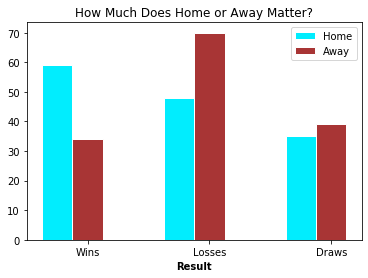

In [16]:
# set width of bar
barWidth = 0.25
 
# set height of bar
home_result = [home_wins, home_losses, home_draws]
away_result = [away_wins, away_losses, away_draws]

 
# Set position of bar on X axis
r1 = np.arange(len(home_result))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, home_result, color='#01EDFE', width=barWidth, edgecolor='white', label='Home')
plt.bar(r2, away_result, color='#A83535', width=barWidth, edgecolor='white', label='Away')

# Add labels
plt.xlabel('Result', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(home_result))], ['Wins', 'Losses', 'Draws'])
plt.title("How Much Does Home or Away Matter?")
 
# Create legend & Show graphic
plt.legend()
plt.show()

## Most Important Statistic ##
I am going to try and find the most important game statistics that lead to West Ham winning or losing by running some correlations on the numerical data. For simplicity, I am going to remove draws from the dataset so I can just look at wins and losses. 

In [23]:
# Remove draws
df_results = df[df['FTR']!='D']

#Initialize empty list for new column. 
WH_win = []

for index, row in df_results.iterrows():
    #If West Ham is the home team
    if row['HomeTeam']=='West Ham':
        if row['FTR']=='H':
            WH_win.append(1)
        else:
            WH_win.append(0)
    #Away team results
    else:
        if row['FTR']=='A':
            WH_win.append(1)
        else:
            WH_win.append(0)

In [29]:
df_results['WH_Win'] = WH_win
df_results.tail()

C:\Users\Hawkin Saeger\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,WH_Win
280,2019-12-04,Wolves,West Ham,2.0,0.0,H,1.0,0.0,H,13.0,...,5.0,4.0,1.0,2.0,0.0,0.0,1.75,3.7,4.75,0
281,2019-12-09,West Ham,Arsenal,1.0,3.0,A,1.0,0.0,H,11.0,...,4.0,3.0,2.0,0.0,0.0,0.0,3.30,4.0,2.00,0
282,2019-12-14,Southampton,West Ham,0.0,1.0,A,0.0,1.0,A,11.0,...,5.0,8.0,1.0,3.0,0.0,0.0,1.90,3.8,3.80,1
283,2019-12-26,Crystal Palace,West Ham,2.0,1.0,H,0.0,0.0,D,13.0,...,7.0,6.0,0.0,2.0,0.0,0.0,2.30,3.4,3.10,0
284,2019-12-28,West Ham,Leicester,1.0,2.0,A,1.0,1.0,D,14.0,...,5.0,5.0,4.0,1.0,0.0,0.0,4.00,3.9,1.83,0


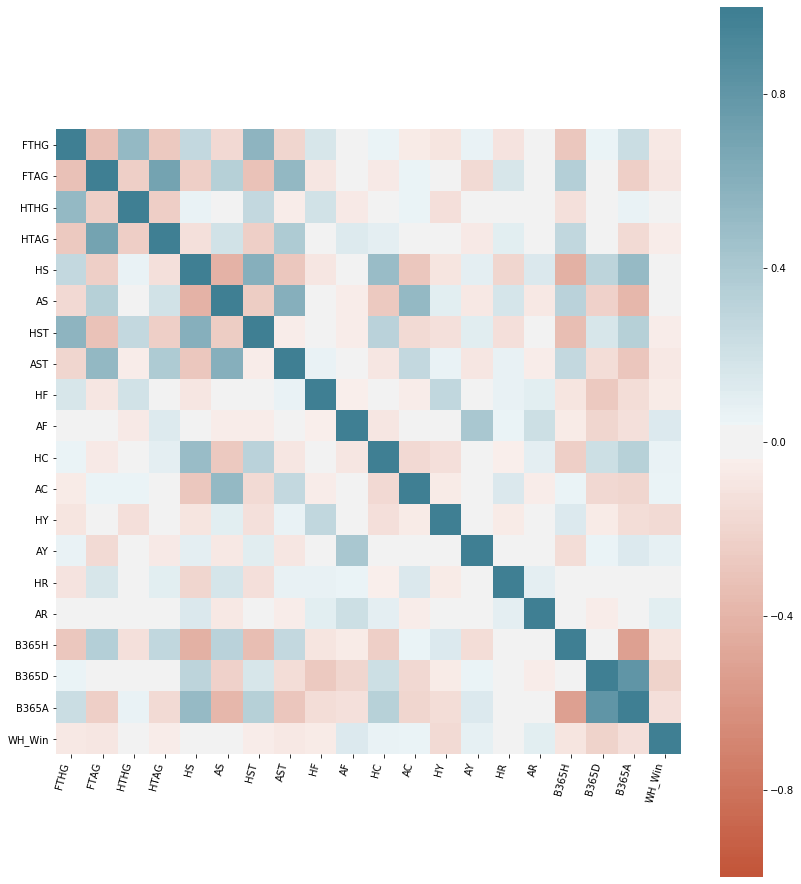

In [43]:
# Seaborn Heatmap of the Correlations
data = df_results

corr = data.corr()

plt.figure(figsize=(14, 16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=75,
    horizontalalignment='right'
);

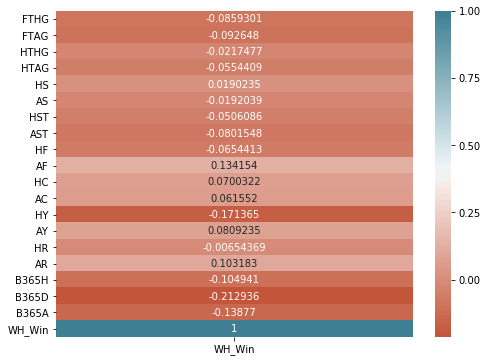

In [59]:
# Just look at the one column
wh_corr = pd.DataFrame(corr['WH_Win'])

plt.figure(figsize=(8, 6))
sns.heatmap(wh_corr, annot=True, fmt="g", cmap=sns.diverging_palette(20, 220, n=200))

pandas.core.series.Series